# Zach's Lessonimport pandas as pd
import re

___

# Regex

Pretty usful in any form of string manipulation.

- What is a regular expression?
    - a language for describing regualr text
        - way to decribe things like a series of numbers followed by white space followed by letters a-z
    - python flavored regex, but larger in scope
    - can be used in SQl
        - like qildcards but more powerfuk
        - if this string/column matches a reg expression
        - can be used all over the place
- When are regular expressions useful?
    - when you are parsing regular text
    - structured (some sort) text
    - data acquitition
    - data preparation
    - amybe in exploration
    - when using text data
    - simple and complex operations
    
- Parsing
    - whenever we are extracting meaning from something
    - reason about it, break it down into its parts, then use it
        - in progrming we are looking at text itself.

In [1]:
import pandas as pd
import re

In [2]:
log_file_lines = '''
76.185.131.226 - - [11/May/2020:14:25:53 +0000] "GET / HTTP/1.1" 200 42 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:25:46 +0000] "GET / HTTP/1.1" 200 42 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:25:58 +0000] "GET / HTTP/1.1" 200 42 "-" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36"
76.185.131.226 - - [11/May/2020:16:25:58 +0000] "GET /favicon.ico HTTP/1.1" 200 162 "https://python.zach.lol/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36"
104.5.217.57 - - [11/May/2020:16:26:27 +0000] "GET / HTTP/1.1" 200 42 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:26:46 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:26:54 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
104.5.217.57 - - [11/May/2020:16:27:04 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:27:05 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
76.185.131.226 - - [11/May/2020:16:27:10 +0000] "GET /documentation HTTP/1.1" 200 348 "-" "python-requests/2.23.0"
'''

# there are patterns that we can describe 
    # ip address 
        # some have 2 to start some have 3
    # spaces athen some -'s
    # follod by a date
    # followed by a webpage

- search: 
    - shows a single match for a regex
- findall: 
    - shows *all* the matches for a regex in a subject

### Literals

In [3]:
regexp = r'a' 
subject = 'abc'
# generally how we will use regualr exprssion

re.search(regexp, subject)
# the the search funciton and get back a Match object
    # mathc is from index 0 to 1 in the subject
# any character a-z, A-Zz or 0-9 
    # are regular exp characters that match themselves

<re.Match object; span=(0, 1), match='a'>

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Use the cell above to start experimenting with regular expressions.</p>
    <ol>
        <li>Change your regular expression to match the literal character "b". What do you notice?</li>
        <li>Change your regular expression to match the literal string "ab". What do you notice?</li>
        <li>Change your regular expression to match the literal "d". What do you notice?</li>
        <li>Use <code>re.findall</code> instead of <code>re.search</code>. How do the results differ?</li>
        <li>Change your regular expression to just the "." character. What are the results?</li>
    </ol>
</div>

In [4]:
# Change your regular expression to match the literal character "b". 
regexp = r'b'
subject = 'abc'

re.search(regexp, subject)

# What do you notice?
    # the match changes to b
    # span changes to 1, 2

<re.Match object; span=(1, 2), match='b'>

In [5]:
# Change your regular expression to match the literal string "ab". 
regexp = r'ab'
subject = 'abc'

re.search(regexp, subject)

# What do you notice?
    # match changes to ab
    # span changes to 0, 2

<re.Match object; span=(0, 2), match='ab'>

In [6]:
# Change your regular expression to match the literal "d". 
regexp = r'd'
subject = 'abc'

re.search(regexp, subject)

# What do you notice?
    # nothing happens
        # maybe because d is not in the sbject line

In [7]:
# Use re.findall instead of re.search. 
regexp = r'a'
subject = 'abc'

re.findall(regexp, subject)

# How do the results differ?
    # just shows the regular expression
    # no mathc object
    # no span
    
# this will produce all of the matches in the string
    # hence 'findall'... FIND ALL

['a']

In [8]:
# Change your regular expression to just the "." character. 
regexp = r'.'
subject = 'abc'

re.search(regexp, subject)

# What are the results?
    # defaults to an 'a' regular expression

<re.Match object; span=(0, 1), match='a'>

In [9]:
# Change your regular expression to just the "." character. and Use re.findall instead of re.search. 
regexp = r'.'
subject = 'abc'

re.findall(regexp, subject)

# What are the results?
    # shows all elements of the subject
        # actslike a comand f to search a documnet 

['a', 'b', 'c']

In [10]:
regexp = r'.'
subject = 'abc'

len(re.findall(regexp, subject))
# gets the numeric value of how many there are

3

`search` just finds the first instance while `findall` finds all of the matches

- r is commonly used in the expression
     - means raw
     - uncooked string
     - \'s are preserved
     - u is unicode

In [11]:
# aside : python strings
len(r"\n")

2

In [12]:
len('\n')

1

### Metacharacters

- `.`
- `\w`
- `\s`
- `\d`
- Captial variants:
    - matches anything that is not described by the lower case varient
        - D 
            - matches everything that is not a digit
        - W
            - matches anything that is not a word
        - S 
            - mathces anything that is not a hwite space
        - etc.

In [13]:
regexp = r'\w' # means look for anything a-z 0-9 or an underscore
subject = 'abc 123' 

re.search(regexp, subject)

<re.Match object; span=(0, 1), match='a'>

In [14]:
regexp = r'\s' # looks for whitespaces
subject = 'abc 123' 

re.search(regexp, subject)

<re.Match object; span=(3, 4), match=' '>

In [15]:
regexp = r'\d' # looks for whitespaces
subject = 'abc 123' 

re.search(regexp, subject)

<re.Match object; span=(4, 5), match='1'>

In [16]:
regexp = r'\S' # looks for not numeric
subject = 'abc 123' 

re.search(regexp, subject)

<re.Match object; span=(0, 1), match='a'>

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Continue to use the same subject variable from above.</p>
    <ol>
        <li>Use all of the above metacharacters with <code>re.findall</code>. What do you notice?</li>
        <li>What does the regular expression <code>\w\w</code> match?</li>
        <li>Use only metacharacters to write a regular expression to match "c 1".</li>
        <li>Use a combination of metacharacters to match 3 digits in a row.</li>
    </ol>
</div>

In [17]:
# Use all of the above metacharacters with re.findall. 
regexp = r'\w'
subject = 'abc 123' 

re.findall(regexp, subject)

['a', 'b', 'c', '1', '2', '3']

In [18]:
regexp = r'\s'
subject = 'abc 123' 

re.findall(regexp, subject)

[' ']

In [19]:
regexp = r'\d'
subject = 'abc 123' 

re.findall(regexp, subject)

['1', '2', '3']

In [20]:
regexp = r'\.'
subject = 'abc 123' 

re.findall(regexp, subject)
# What do you notice?
    # pulls diffrent parts for each one

[]

In [21]:
# What does the regular expression \w\w match?
regexp = r'\w\w'
subject = 'abc 123' 

re.findall(regexp, subject)

['ab', '12']

In [22]:
# Use only metacharacters to write a regular expression to match "c 1".
regexp = r'\w\s\d'
subject = 'abc 123' 

re.findall(regexp, subject)

['c 1']

In [23]:
# Use a combination of metacharacters to match 3 digits in a row.
regexp = r'\d\d\d'
subject = 'abc 123' 

re.findall(regexp, subject)

['123']

### Repeating
- `{}`
    - specific number of repitions
- `*`
    - zero or more
- `+`
    - one or more
- `?`
    - optional
- greedy + non-greedy
    - the question mark can mean something different in a diffrent context

In [24]:
regexp = r'\w+' # one or more word characters
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 3), match='abc'>

In [25]:
regexp = r'\s*\w' #works wether there are no spaces or more than 0 spaces followed by a letter
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 1), match='a'>

In [26]:
regexp = r'\d+' # one or more digits
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(4, 7), match='123'>

In [27]:
regexp = r'\d{2}' # 2 digits in a row one after another
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(4, 6), match='12'>

In [28]:
regexp = r'\s{2}' # 2 digits in a row one after another
subject = 'abc 123'

re.search(regexp, subject)

# gets nothing because there is only 1 space not 2

In [29]:
regexp = r'\w{2,5}' # 2 through 5 in a row
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 3), match='abc'>

In [30]:
regexp = r'abcd?' # what ever comes before the ? is optional
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 3), match='abc'>

In [31]:
regexp = r'\w+'  # plus operate on whatever comes before it
                    # operates greedily by defalts
                    # tries to find as much as it can
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 3), match='abc'>

In [32]:
regexp = r'\w+?'  # plus operate on whatever comes before it
                    # adding the question mark makes it nongreedy
                    # wants the least possible number of matches
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 1), match='a'>

In [33]:
regexp = r'.+\d' #match as much as we can match, and then a digit
subject = 'abc 123'

re.search(regexp, subject)

# greedy

<re.Match object; span=(0, 7), match='abc 123'>

In [34]:
regexp = r'.+?\d' #match as little as we can match, and then a digit
subject = 'abc 123'

re.search(regexp, subject)
# non greedy

<re.Match object; span=(0, 5), match='abc 1'>

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Use the string below as your subject for this exercise.</p>
    <pre><code>Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, San Antonio, TX 78230. You can find us online at http://codeup.com and our alumni portal is located at https://alumni.codeup.com.</code></pre>
    <ol>
        <li>Write a regular expression that matches all the numbers.</li>
        <li>Write a regular expression that matches a 5 digit number, but not a number with fewer digits.</li>
        <li>Write a regular expression that matches any urls in the subject.</li>
    </ol>
</div>

In [35]:
# Write a regular expression that matches all the numbers.
regexp = r'\d+'
subject = 'Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, San Antonio, TX 78230. You can find us online at http://codeup.com and our alumni portal is located at https://alumni.codeup.com.'

re.findall(regexp, subject)

['2014', '600', '350', '78230']

In [36]:
# Write a regular expression that matches a 5 digit number, 
    # but not a number with fewer digits.
regexp = r'\d\d\d\d\d+?'
subject = 'Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, San Antonio, TX 78230. You can find us online at http://codeup.com and our alumni portal is located at https://alumni.codeup.com.'

re.findall(regexp, subject)

['78230']

In [37]:
# Write a regular expression that matches a 5 digit number, 
    # but not a number with fewer digits.
regexp = r'\d{5}'
subject = 'Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, San Antonio, TX 78230. You can find us online at http://codeup.com and our alumni portal is located at https://alumni.codeup.com.'

re.findall(regexp, subject)

['78230']

In [38]:
# Write a regular expression that matches any urls in the subject.
regexp = r'https?://.+?com'
subject = 'Codeup, founded in 2014, is located at 600 Navarro St. Suite 350, San Antonio, TX 78230. You can find us online at http://codeup.com and our alumni portal is located at https://alumni.codeup.com.'

re.findall(regexp, subject)

['http://codeup.com', 'https://alumni.codeup.com']

### Any/None Of

In [39]:
regexp = r'[a1][b2][c3]'
subject = 'abc 123'

re.match(regexp, subject)

<re.Match object; span=(0, 3), match='abc'>

In [40]:
regexp = r'[a1][b2][c3]'
subject = 'abc 123'

re.findall(regexp, subject)

['abc', '123']

In [41]:
regexp = r'[^c3]+'
subject = 'abc 123'

re.findall(regexp, subject)

['ab', ' 12']

In [42]:
subject = '123abc'

re.match(regexp, subject)

<re.Match object; span=(0, 2), match='12'>

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>For this exercise you should make up various subjects and test them with your regular expressions.</p>
    <ol>
        <li>Write a regular expression that matches even numbers.</li>
        <li>Write a regular expression that matches 2 or more odd numbers in a row.</li>
        <li>Write a regular expression that any word with a vowel in it.</li>
    </ol>
</div>

In [43]:
# Write a regular expression that matches even numbers.
regexp = r'[02468]'
subject = '12387725384580284798abc pancake slap rhymthm'

re.findall(regexp, subject)

['2', '8', '2', '8', '4', '8', '0', '2', '8', '4', '8']

In [44]:
# Write a regular expression that matches 2 or more odd numbers in a row.
regexp = r'[13579]{2,}'
subject = '12387725384580284798abc pancake slap rhymthm'

re.findall(regexp, subject)

['77', '53', '79']

In [63]:
# Write a regular expression that any word with a vowel in it.
regexp = r'[aeiou]'
subject = '12387725384580284798abc pancake slap rhymthm'

re.search(regexp, subject)

<re.Match object; span=(20, 21), match='a'>

In [79]:
# Write a regular expression that any word with a vowel in it.
regexp = r'[aeiou]'
subject = '12387725384580284798abc pancake slap rhymthm'

re.findall(regexp, subject)

['a', 'a', 'a', 'e', 'a']

### Anchors

- `^`
    - starts with
- `$`
    - ends with

In [61]:
regexp = r'^.*\d$'
subject = 'abc 123'

re.search(regexp, subject)

<re.Match object; span=(0, 7), match='abc 123'>

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>For this exercise you should make up various subjects and test them with your regular expressions.</p>
    <ol>
        <li>Write a regular expression that matches if a word starts with a vowel.</li>
        <li>Write a regular expression that matches if a word starts with a capital letter.</li>
        <li>Write a regular expression that matches if a word ends with a capital letter.</li>        
        <li>Write a regular expression that matches if a word starts <b>and</b> ends with a capital letter.</li>
    </ol>
</div>

In [64]:
# Write a regular expression that matches if a word starts with a vowel.
regexp = r'b'
subject = 'abc 123'


re.search(regexp, subject)

<re.Match object; span=(1, 2), match='b'>

In [47]:
# Write a regular expression that matches if a word starts with a capital letter.
regexp = r'^[aeiou]'
subject = 'Aabc 123D'

re.search(regexp, subject)

In [48]:
# Write a regular expression that matches if a word ends with a capital letter.
regexp = r'^[A-Z]'
subject = 'Aabc 123D'

re.search(regexp, subject)

<re.Match object; span=(0, 1), match='A'>

In [49]:
regexp = r'[A-Z]$'
subject = 'Aabc 123D'

re.search(regexp, subject)

<re.Match object; span=(8, 9), match='D'>

In [50]:
# Write a regular expression that matches if a word starts and ends with a capital letter.
regexp = r'^[A-Z].*[A-Z]$'
subject = 'Aabc 123D'

re.search(regexp, subject)

<re.Match object; span=(0, 9), match='Aabc 123D'>

In [56]:
regexp = r'^[A-Z].*[A-Z]$'
subject = 'Aabc 123D'

re.findall(regexp, subject)

['Aabc 123D']

### Capture Groups
Wrapping any part of regular expression in () creates a **capture group**.

In [65]:
regexp = r'([a-z]+)\s(\d+)'
subject = 'abc 123'

match = re.search(regexp, subject)
match.groups()

('abc', '123')

In [66]:
s = pd.Series(['abc', 'abc123', '123'])
s

0       abc
1    abc123
2       123
dtype: object

In [67]:
s.str.extract(r'(\d+)')

,0
0,NaN
1,123
2,123


## `re.sub`

- removing
- substitution

In [68]:
regexp = r'\d+'
subject = 'abc123'

re.sub(regexp, '', subject)

'abc'

In [69]:
regexp = r'([a-z]+)(\d+)'
subject = 'abc123'

re.sub(regexp, r'\2\1', subject)

'123abc'

In [70]:
s

0       abc
1    abc123
2       123
dtype: object

In [71]:
s.str.replace(r'.*(\d).*', r'\1', regex=True)

0    abc
1      3
2      3
dtype: object

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise
    </div>
    <p>Use the code below to get started on this exercise.</p>
    <pre><code>dates = pd.Series(['2020-11-12', '2020-07-13', '2021-01-12'])</code></pre>
    <p>Use regular expression substitution to reformat the dates in the format common in the US: m/d/y.</p>
</div>

In [72]:
# Use regular expression substitution to reformat the dates 
    # in the format common in the US: m/d/y.
dates = pd.Series(['2020-11-12', '2020-07-13', '2021-01-12'])
dates

0    2020-11-12
1    2020-07-13
2    2021-01-12
dtype: object

In [73]:
dates.str.replace(r'(\d{4})-(\d{2})-(\d{2})', r'\2/\3/\1', regex=True)

0    11/12/2020
1    07/13/2020
2    01/12/2021
dtype: object

## Misc

### Pandas Usage

- `.str`
    - `.extract`
    - `.count`
    - `.contains`
    - `.replace`
- extract + concat
- named groups

In [74]:
df = pd.DataFrame()
df['text'] = pd.Series([
    'You should go check out https://regex101.com, it is a great website!',
    'My favorite search engine is https://duckduckgo.com',
    'If you have a question, you can get it answered through http://askjeeves.com, it is great!',
])
df

,text
0,"You should go check out https://regex101.com, ..."
1,My favorite search engine is https://duckduckg...
2,"If you have a question, you can get it answere..."


In [75]:
df.text.str.extract(r'(https?)://(\w+)\.(\w+)')

,0,1,2
0,https,regex101,com
1,https,duckduckgo,com
2,http,askjeeves,com


### Interactive Regex Tool

To install the `hlre` tool:

```
python -m pip install hlre
```

[For more documentation and the source](https://github.com/zgulde/hlre)

See also [regex101](https://regex101.com) (make sure to select the Python flavor)

### Named capture groups

In [76]:
text = 'You should go check out https://regex101.com, it is a great website!'

match = re.search(r'(?P<protocol>https?)://(?P<base_domain>\w+)\.(?P<tld>\w+)', text)
match.groupdict()

{'protocol': 'https', 'base_domain': 'regex101', 'tld': 'com'}

In [77]:
df.text.str.extract(r'(?P<protocol>https?)://(?P<base_domain>\w+)\.(?P<tld>\w+)')

,protocol,base_domain,tld
0,https,regex101,com
1,https,duckduckgo,com
2,http,askjeeves,com


### Verbose regular expressions

- `re.VERBOSE`
- `(?# this is a comment)`

In [78]:
text = 'You should go check out https://regex101.com, it is a great website!'

regexp = r'''
(?P<protocol>https?)
:// (?# ignore the :// that seperates protocol from domain)
(?P<base_domain>\w+)
\.
(?P<tld>\w+)
'''
match = re.search(regexp, text, re.VERBOSE) # whitespace in the regex is ignored
match.groupdict()

{'protocol': 'https', 'base_domain': 'regex101', 'tld': 'com'}

___

# Curriculum Lesson

## Regular Expressions
A regular expression is a sort of meta-language that can be used to describe patterns in text.

Regexes are most commonly used in one of two ways:
- To find/extract text that matches a pattern.
- To replace/substitute text that matches a pattern.


## The re module
To demonstrate regular expressions, we'll be using the `re` module from the python standard library, and its `findall` function. Many other libraries also work with regular expressions.

This function will accept a string that is a regular expression, the `pattern`, and another string that is the string to be searched. `findall` will return a list of all of the times the given regular expression matches the string.



## Raw Strings

Any string in python prefixed with a r is a **raw string**. This means that backslashes will be included in the string verbatim, and don't carry special meaning. It is very common to use raw strings when creating a regular expression.

## Basic Regexes
At it's most basic, any alpha numeric character is a valid regular expression.



In [80]:
import re

re.findall(r'b', 'abcd')

['b']

We'll define a function here to simplify the process of showing many results from regular expressions.

In [81]:
def show_all_matches(regexes, subject, re_length=6):
    print('Sentence:')
    print()
    print('    {}'.format(subject))
    print()
    print(' regexp{} | matches'.format(' ' * (re_length - 6)))
    print(' ------{} | -------'.format(' ' * (re_length - 6)))
    for regexp in regexes:
        fmt = ' {:<%d} | {!r}' % re_length
        matches = re.findall(regexp, subject)
        if len(matches) > 8:
            matches = matches[:8] + ['...']
        print(fmt.format(regexp, matches))

In [82]:
sentence = 'Mary had a little lamb. 1 little lamb. Not 10, not 12, not 22, just one.'

show_all_matches([
    r'a',
    r'm',
    r'M',
    r'Mary',
    r'little',
    r'1',
    r'10',
    r'22'
], sentence)

Sentence:

    Mary had a little lamb. 1 little lamb. Not 10, not 12, not 22, just one.

 regexp | matches
 ------ | -------
 a      | ['a', 'a', 'a', 'a', 'a']
 m      | ['m', 'm']
 M      | ['M']
 Mary   | ['Mary']
 little | ['little', 'little']
 1      | ['1', '1', '1']
 10     | ['10']
 22     | ['22']


## Metacharacters and Character Classes
In addition to letters and numbers, there are special **metacharacters** in regular expressions. These are characters that match several different kinds of characters, but don't match the character itself literally like others. Metacharacters must be **escaped** to match the character itself.

Here are several metacharacters that represent various **character classes**.

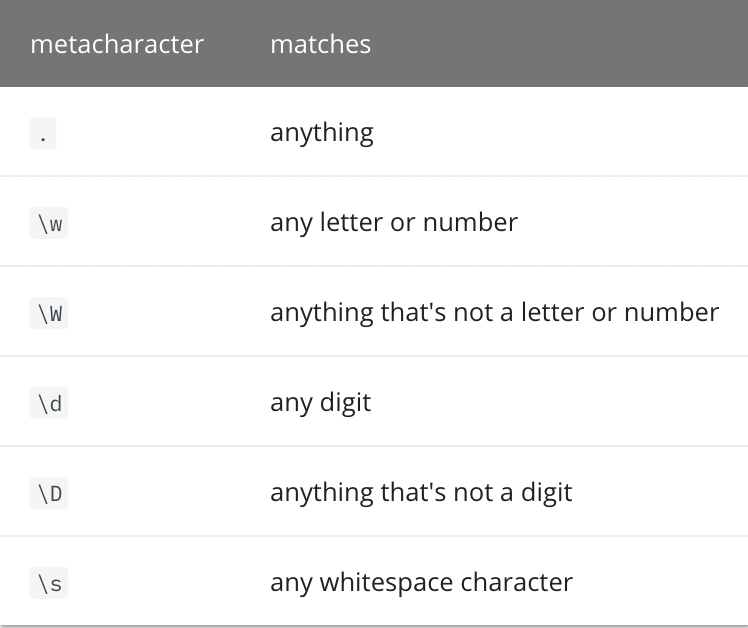

In [83]:
res = [
    r'\w',
    r'\d',
    r'\s',
    r'.', # matches every character
    r'\.', # a literal period
]
show_all_matches(res, sentence)

Sentence:

    Mary had a little lamb. 1 little lamb. Not 10, not 12, not 22, just one.

 regexp | matches
 ------ | -------
 \w     | ['M', 'a', 'r', 'y', 'h', 'a', 'd', 'a', '...']
 \d     | ['1', '1', '0', '1', '2', '2', '2']
 \s     | [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '...']
 .      | ['M', 'a', 'r', 'y', ' ', 'h', 'a', 'd', '...']
 \.     | ['.', '.', '.']


These can be combined together.

In [ ]:
show_all_matches([r'l\w\w\w\W', r'\d\d'], sentence, re_length=9)

## Repeating
All of the metacharacters in the table below will match the previous character a repeated number of times.

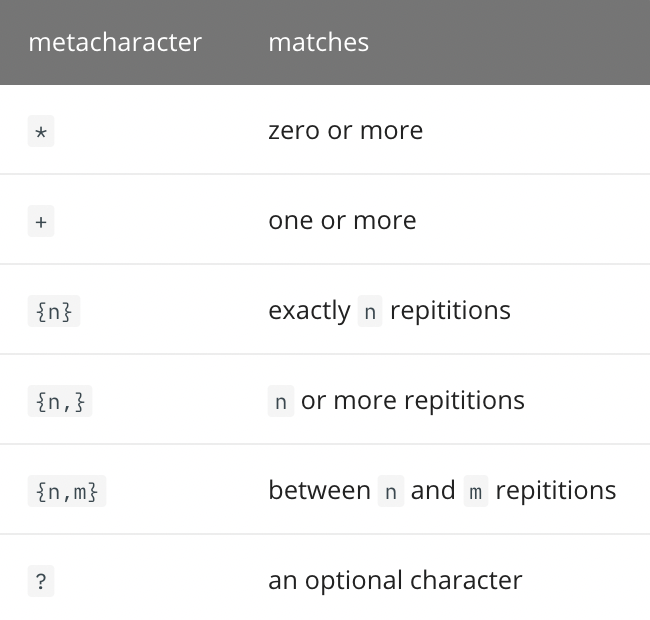

In [ ]:
show_all_matches([
    r'\d+'
], sentence)

print('\n---\n')

show_all_matches([
    r'a{2,}',
    r'a{2}',
    r'a{3,4}'
], 'aabbaaaa')

## Any of or None of
The square brackets in a regular expression represent a single character that will match any of the values within the square brackets. For example, `[ab]` will match either an 'a' or a 'b'.

If the first character inside of the square brackets is a caret, `^`, then anything that is not inside of the square brackets will be matched. For example, `[^ab]` will match any character that is neither 'a' nor 'b'.

Inside of square brackets, ranges of letters and numbers can be abbreviated with a hypen.



In [ ]:
show_all_matches([
    r'[lt]',
    r'[lt]+',
    r'[^aeiou\s\.]', # any letter that's not a vowel
    r'[a-d]'
], sentence, re_length=12)

## Anchors
There are several special metacharacters that don't match any individual characters, but serve as an "anchor" for the rest of the regular expression.

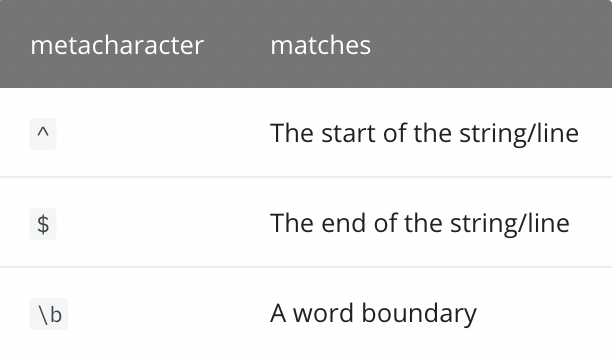

In [ ]:
show_all_matches([
    r'\bo\w+', # any word that starts with an 'o'
    r'^\s', # starts with a space
    r'^M', # starts with 'M'
    r'\.$', # ends with a period
], sentence)

## Other Common Functions
- `match`: 
    - Matches from the start of the string.
- `search`: 
    - Find the first instance of the regular expression.
- `sub`: 
    - Make substitutions with a regular expression.
- `compile`: 
    - Prepare a regular expression for use ahead of time.
    
Now we'll take a look at using `search` and `sub` in more detail.

## Capture Groups
We can define groups in our regular expressions called **capture groups**. This allows us to reference the groups later on in the regular expression, or apply repitition to the group as a whole.

Note that when we include capture groups in our regular expressions, **findall** will return only the matched groups, not the entire text that was matched.

In [ ]:
sentence = '''
You can find us on the web at https://codeup.com. Our ip address is 123.123.123.123 (maybe).
'''.strip()

In [ ]:
ip_re = r'\d+(\.\d+){3}'

match = re.search(ip_re, sentence)
match[0]

In [ ]:
# simplified for demonstration, a real url to parse urls would be much more
# complex
url_re = r'(https?)://(\w+)\.(\w+)'

protocol, domain, tld = re.search(url_re, sentence).groups()

print(f'''
protocol: {protocol}
domain:   {domain}
tld:      {tld}
''')

You can create non-capturing (aka shy) groups by adding `?:` to the beginning of the group, and groups can be named by adding `?P<name>`.

In [ ]:
url_re = r'(?P<protocol>https?)://(?:\w+)\.(?P<tld>\w+)'

match = re.search(url_re, sentence)

print(f'''
groups: {match.groups()}
referencing a group by name: {match.group('tld')}
group dictionary: {match.groupdict()}
''')

## Substitution
We can use a regular expression to replace or remove parts of a string. In addition, if the supplied regular expression has capture groups in it, the text captured can be referenced when making the substitution.

In [ ]:
# remove anything that's not a digit
re.sub(r'\D', '', 'abc 123')

In [ ]:
# remove anything that's not a letter
re.sub(r'[^a-z]', '', 'abc 123')

In [ ]:
re.sub(r'.(.).', r'\1', 'abc')

In [ ]:
re.sub(r'(.)(.)(.)', r'\3\2\1', 'abc')

In [ ]:
re.sub(r'.{2}$', 'X', 'abc')

## Regex Flags
Include any of the flags below as the last argument to any of the regular expressions method mentioned in this lesson, and that behavior will be enabled for that use of the regular expression.

- `re.MULTILINE`: 
    - The `^` and `$` anchors will apply line by line, instead of applying to start and end of the string.
- `re.IGNORECASE`: 
    - Ignore character casing when matching.
- `re.VERBOSE`: 
    - Ignore any whitespace in the regular expression. This can be useful to make more readable regular expressions, especially when combined with non-capturing comment groups.

In [ ]:
regexp = r'''
[aeiou] (?# any vowel)
[^aeiou] (?# followed by a non-vowel)
'''

The above is equivalent to the following.

In [ ]:
regexp = r'[aeiou][^aeiou]'

When the `VERBOSE` flag is set.